<a href="https://colab.research.google.com/github/nicolegold/AnalistaMachineLearning/blob/master/cap4FAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets #sklearn é uma das lib mais utilizadas em ML, ela contém, além dos 
                            #datasets, várias outras funções úteis para a análise de dados
                            # essa lib será sua amiga durante toda sua carreira
import pandas as pd  # importa a lib Pandas. Essa lib é utilizada para lidar com dataframes (TABELAS) 
                     #de forma mais amigável. 
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e test
from sklearn.svm import SVC      #importa o algoritmo svm para ser utilizado 
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
from sklearn import metrics  #utilizada para as métricas de comparação entre os métodos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [0]:
#got_dataset=pd.read_csv('../input/game-of-thrones/character-predictions.csv')  #realiza a leitura do dataset #foi importado do kaggle
got_dataset = pd.read_csv('character-predictions.csv', sep="," , encoding="UTF8" ) #mas agora preciso importar pelo colab

In [82]:
got_dataset.info() #conhecendo o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [83]:
got_dataset.head()  #mostrando o dataset

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [84]:
nans = got_dataset.isna().sum() #contando a quantidade de valores nulos
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [85]:
#Tamanho do dataset
len(got_dataset)

1946

In [86]:
# analisando os dados nulos
print(got_dataset["age"].mean())   #possível erro no nosso dataset (média negativa para a idade?)

-1293.5635103926097


In [87]:
# realizando uma maior análise do dataset
print(got_dataset["name"][got_dataset["age"] < 0])
print(got_dataset['age'][got_dataset['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [0]:
#substituindo os valores negativos
got_dataset.loc[1684, "age"] = 25.0
got_dataset.loc[1868, "age"] = 0.0

In [89]:
print(got_dataset["age"].mean())   #verificando, novamente, a idade

36.70438799076212


In [0]:
#trabalhando com dados nulos
got_dataset["age"].fillna(got_dataset["age"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna
got_dataset["culture"].fillna("", inplace=True) #preenchendo os valores nulos da coluna cultura com uma string nula

# preenchendo os demais valores com -1 (para posteriormente poder identificar que ele era um valor nulo)
got_dataset.fillna(value=-1, inplace=True)

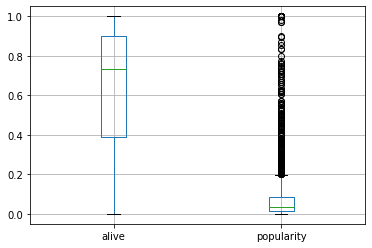

In [91]:
#realizando o boxplot 
got_dataset.boxplot(['alive','popularity'])

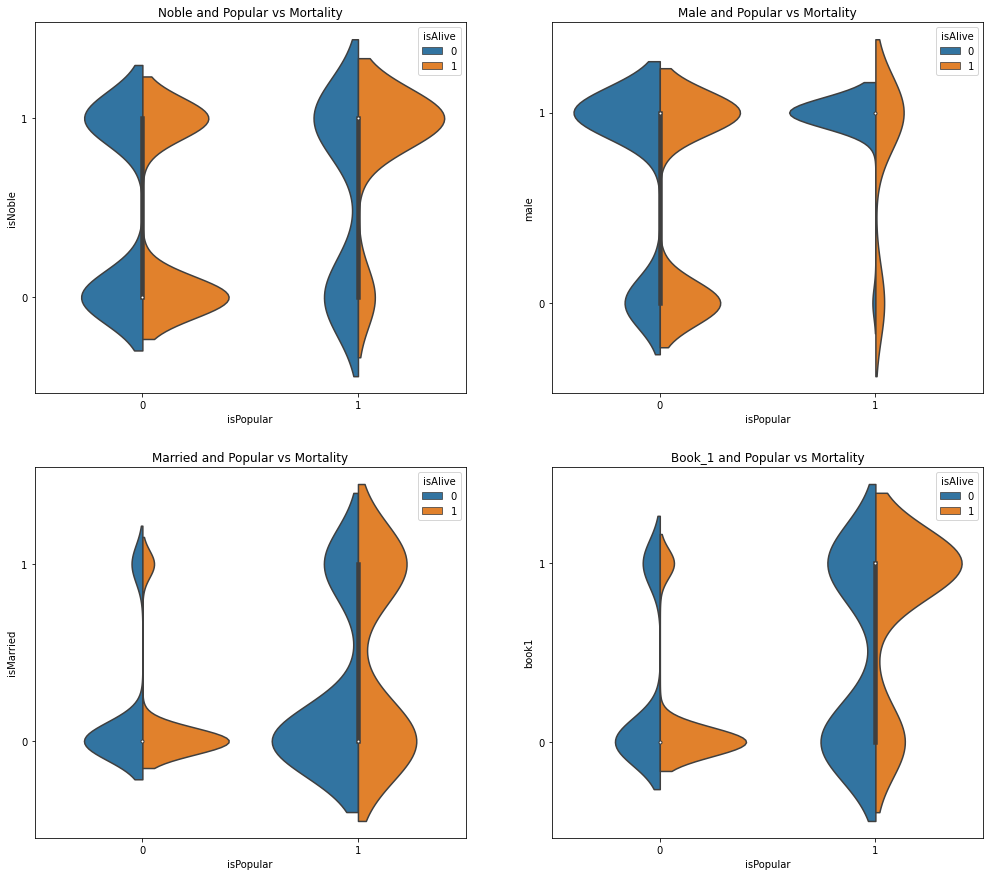

In [92]:
#analisando a "mortalidade" dos personagens
import warnings
warnings.filterwarnings('ignore')
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isPopular", "isNoble", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isPopular", "male", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isPopular", "isMarried", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isPopular", "book1", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))


plt.show()

In [0]:
# Retirando algumas colunas 
drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
got_dataset.drop(drop, inplace=True, axis=1)

#Salvando uma cópia do dataset para aplicar o hotencoder
got_dataset_2 = got_dataset.copy(deep=True)

In [0]:
# transformando os dados categóricos em one-hot-encoder
got_dataset = pd.get_dummies(got_dataset)

In [95]:
got_dataset.head()

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,title_-1,title_Acorn Hall,title_Andals,title_Arbor,title_Archmaester,title_Ashford,title_Banefort,title_Barrowton,title_Bear Island,title_Big BucketThe Wull,title_Bitterbridge,title_Black Wind,title_Blackcrown,title_Blackmont,title_Blacktyde,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,...,spouse_Shiera Crakehall,spouse_Shierle Swyft,spouse_Sigorn,spouse_Simon Staunton,spouse_Stannis Baratheon,spouse_Steffon Baratheon,spouse_Stevron Frey,spouse_Stonetree,spouse_Sybell Spicer,spouse_Sybelle Glover,spouse_Sylva Santagar,spouse_Sylwa Paege,spouse_Symond Frey,spouse_Taena of Myr,spouse_Teora Kyndall,spouse_Theodore Tyrell,spouse_Theomar Smallwood,spouse_Titus Peake,spouse_Tya Lannister,spouse_Tyana Wylde,spouse_Tygett Lannister,spouse_Tyrek Lannister,spouse_Tyrion Lannister,spouse_Tysha,spouse_Tytos Frey,spouse_Tywin Lannister,spouse_Victaria Tyrell,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Willam Dustin,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Ysilla,spouse_Ysilla Royce,spouse_Zhoe Blanetree
0,0,1,-1.0,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,36.704388,11,1,1,0.605351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,208.0,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.000000,1,1,1,0.896321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,-1.0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,36.704388,0,0,0,0.267559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,82.0,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.000000,0,0,0,0.183946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,276.0,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.000000,0,0,0,0.043478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Separando o dataset entre entradas e saídas
x = got_dataset.iloc[:,1:].values
y = got_dataset.iloc[:, 0].values

In [0]:
# aplicando o modelo de validação cruzada
# divide o dataset entre 5 diferentes grupos
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [108]:
kfold

KFold(n_splits=5, random_state=42, shuffle=True)

In [0]:
# construindo os modelos de classificação
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [0]:
#utilizando a validação cruzada
mean=[]
std=[]
for model in modelos:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

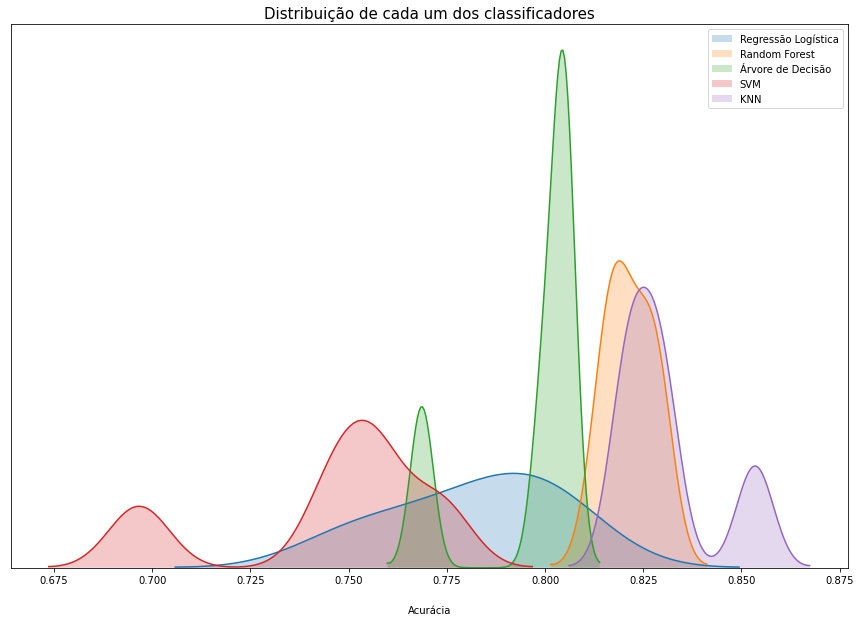

In [109]:
classificadores=['Regressão Logística', 'Random Forest', 'Árvore de Decisão', 'SVM', 'KNN']

plt.figure(figsize=(15, 10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade": True})
    
plt.title("Distribuição de cada um dos classificadores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad=20)
plt.yticks([])

plt.show()

**Realizando a previsão dos classificadores**

** Quais algoritmos escollher?**

In [0]:
# Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=42)

In [110]:
#escolhendo o svm e a floresta randomica
svm_clf = svm.SVC(C=0.9, gamma=0.1, kernel='rbf', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

# Treina os modelos
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# obtém as probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# Valores reais
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

[Text(570.5454545454544, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsao')]

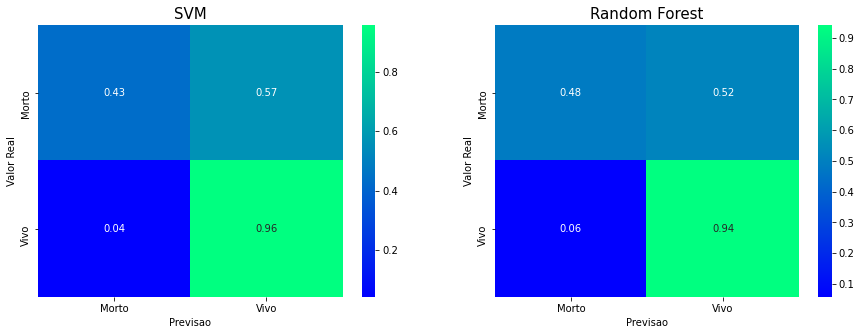

In [104]:
#analisando os modelos 
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[: , np.newaxis]

classes = ["Morto", "Vivo"]
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("SVM", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Previsao", ylabel="Valor Real")

ax[1].set_title("Random Forest", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Previsao", 
                                                                ylabel="Valor Real")